In [176]:
import numpy as np
import pandas as pd
import re
import scipy as scipy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('./data/wellcome.csv', encoding='"ISO-8859-1"')

In [5]:
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


## Assignment goals

1. Determine the five most common journals and the total articles for each
2. Calculate the mean, median, and standard deviation of the open-access cost per article for each journal.
Note: You will need to do considerable data cleaning in order to extract accurate estimates.
3. Bonus: Identify the open access prices paid by subject area.

In [107]:
# Lowercase all journal titles
df['Journal title lower'] = df['Journal title'].apply(lambda x: str(x).lower())

In [106]:
df['Journal title lower'].value_counts().head(5)

plos one                           190
journal of biological chemistry     53
neuroimage                          29
plos pathogens                      24
plos genetics                       24
Name: Journal title lower, dtype: int64

In [108]:
# Remove the currency symbol from the cost column and save this as a float
df['Cost clean'] = df['COST (£) charged to Wellcome (inc VAT when charged)'].apply(lambda x: float(re.sub('£|\$', '', x)))

In [120]:
# Add a currency column
for row in df['COST (£) charged to Wellcome (inc VAT when charged)']:
    if '£' in row:
        df['Currency'] = '£'
    elif '$' in row:
        df['Currency'] = '$'
    else:
        False

In [121]:
# Question: Why does it look like all of these are pounds?
print(df['Publisher'].count())
print(df['Currency'].value_counts())

2127
£    2127
Name: Currency, dtype: int64


In [117]:
# I was able to make this work with this approach
df['Currency'] = np.where(df['COST (£) charged to Wellcome (inc VAT when charged)'].str.contains('£'), '£', '$')

In [118]:
print(df['Publisher'].count())
print(df['Currency'].value_counts())

2127
£    2114
$      13
Name: Currency, dtype: int64


In [129]:
# Calculate the mean, median, and standard deviation of the open-access cost per article
article_mean = df['Cost clean'].mean()
article_median = df['Cost clean'].median()
article_std = df['Cost clean'].std()

print("The mean is: {}. The median is: {}. The standard deviation is: {}.".format(np.round(article_mean, 2), np.round(article_median, 2), np.round(article_std, 2)))

The mean is: 24067.34. The median is: 1884.01. The standard deviation is: 146860.67.


In [170]:
# Bonus: Identify the open access prices paid by subject area
# Not sure how to get this by subject area. I'll look at this by "Journal title"
# Question: How could I have added "count" to this view?

df.groupby(['Journal title lower']).mean().sort_values('Cost clean', ascending=False)

,Cost clean
Journal title lower,
experimental cell research,999999.000000
qualitative research,999999.000000
the journal of cognitive neuroscience,999999.000000
oxford university press,999999.000000
bmc genomics.,999999.000000
pmedicine-d-12-03130,999999.000000
expert reviews in molecular medicine,999999.000000
frontiers in cognition,999999.000000
journal of paediatric urology,999999.000000


In [173]:
# Bonus: Identify the open access prices paid by subject area

average_cost = df.groupby(['Journal title lower']).mean().sort_values('Cost clean', ascending=False)
journal_count = df['Journal title lower'].value_counts().to_frame()

journal_count.join(average_cost)

,Journal title lower,Cost clean
plos one,190,38751.291368
journal of biological chemistry,53,20264.633962
neuroimage,29,2215.168276
plos pathogens,24,84775.044583
plos genetics,24,84839.435000
nucleic acids research,23,1169.217391
plos neglected tropical diseases,20,1563.519000
proceedings of the national academy of sciences,20,693.320500
nature communications,19,55600.705263
human molecular genetics,19,54565.144737


/Users/carl/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


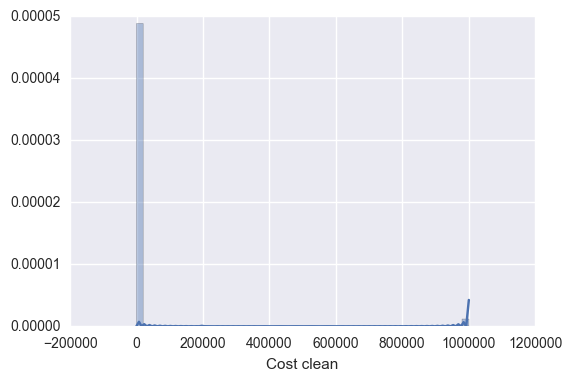

In [175]:
sns.distplot(df['Cost clean'])

/Users/carl/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


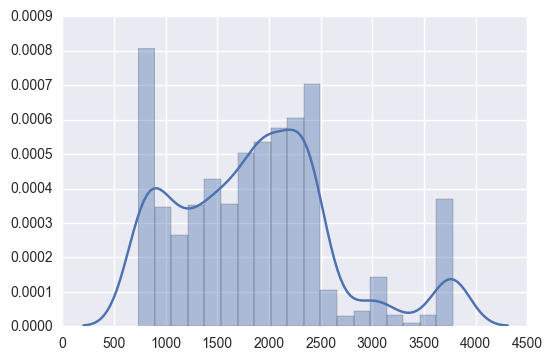

In [179]:
# If we remove the outliers, this data tells a very different story
# Question: How do we determine when to winsorize and by how much?
cost_clean_no_outliers = scipy.stats.mstats.winsorize(df['Cost clean'], limits=0.05)
sns.distplot(cost_clean_no_outliers)